# 1. Preparing Dataframe

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import glob
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image

In [30]:
#Appending all files into one master dataframe for further analysis.
path = r'/content/data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
df = {}
df['website'] = []


for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['website'] = str(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [31]:
df

,Unnamed: 0,links,dates,header,body,b_points,clean,website,Unnamed
0,0.0,https://www.seniorsadvocatebc.ca/osa-reports/h...,"Dec 08, 2021",Hidden and Invisible: Seniors Abuse and Neglec...,"In this report, Seniors Advocate Isobel Macken...","49% increase in report of abuse, neglect and s...","In this report, Seniors Advocate Isobel Macken...",/content/data/seniors_advocate_bc_reports_clea...,NaN
1,1.0,https://www.seniorsadvocatebc.ca/osa-reports/c...,"Oct 06, 2021",Review of COVID-19 Outbreaks in Care Homes in ...,"In this report, Seniors Advocate Isobel Macke...",84% of outbreaks occurred at sites in the lowe...,"In this report, Seniors Advocate Isobel Macke...",/content/data/seniors_advocate_bc_reports_clea...,NaN
2,2.0,https://www.seniorsadvocatebc.ca/osa-reports/s...,"Nov 03, 2020",Staying Apart to Stay Safe: The Impact of Visi...,"In this report, Seniors Advocate Isobel Macke...","Before the pandemic, 55% of families were visi...","In this report, Seniors Advocate Isobel Macke...",/content/data/seniors_advocate_bc_reports_clea...,NaN
3,3.0,https://www.seniorsadvocatebc.ca/osa-reports/a...,"Oct 29, 2020",A Billion Reasons to Care,A Billion Reasons to Careis the first provinc...,financial reporting systems were inconsistent ...,A Billion Reasons to Careis the first provinc...,/content/data/seniors_advocate_bc_reports_clea...,NaN
4,4.0,https://www.seniorsadvocatebc.ca/osa-reports/r...,"Jun 19, 2019",Home Support Review,British Columbia’s home support program is una...,Public home support is unaffordable for most s...,British Columbia’s home support program is una...,/content/data/seniors_advocate_bc_reports_clea...,NaN
...,...,...,...,...,...,...,...,...,...
1310,NaN,https://helpagecanada.ca/2015/09/helpage-inter...,9/28/2015,HelpAge International Releases Third Global Ag...,HelpAge International has released the third G...,NaN,International has released the third Global Ag...,/content/data/helpage_news_cleaned.csv,56.0
1311,NaN,https://helpagecanada.ca/2015/07/join-us-on-oc...,7/28/2015,"Join us on October 1, 2015 for Seen Your Citiz...",About a million Canadian seniors describe them...,NaN,About a million Canadian seniors describe them...,/content/data/helpage_news_cleaned.csv,57.0
1312,NaN,https://helpagecanada.ca/2015/06/minister-alic...,6/15/2015,Minister Alice Wong marks Elder Abuse Day at H...,"Alice Wong, Minister of State (Seniors), visit...",NaN,"Alice Wong, Minister of State (Seniors), visit...",/content/data/helpage_news_cleaned.csv,58.0
1313,NaN,https://helpagecanada.ca/2015/02/february-2-20...,2/2/2015,HelpAge International Releases Report on Impac...,"In 2050, for the first time in history there w...",NaN,"In 2050, for the first time in history there w...",/content/data/helpage_news_cleaned.csv,62.0


In [32]:
#Removing unwanted columns
df = df.drop(df.columns[[0,8]],axis=1)

In [33]:
#Cleaning the website name column
df['website'] = df['website'].str.replace("/content/data/","")
df['website'] = df['website'].str.replace("_cleaned.csv","")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,links,dates,header,body,b_points,clean,website
0,https://www.seniorsadvocatebc.ca/osa-reports/h...,"Dec 08, 2021",Hidden and Invisible: Seniors Abuse and Neglec...,"In this report, Seniors Advocate Isobel Macken...","49% increase in report of abuse, neglect and s...","In this report, Seniors Advocate Isobel Macken...",seniors_advocate_bc_reports
1,https://www.seniorsadvocatebc.ca/osa-reports/c...,"Oct 06, 2021",Review of COVID-19 Outbreaks in Care Homes in ...,"In this report, Seniors Advocate Isobel Macke...",84% of outbreaks occurred at sites in the lowe...,"In this report, Seniors Advocate Isobel Macke...",seniors_advocate_bc_reports
2,https://www.seniorsadvocatebc.ca/osa-reports/s...,"Nov 03, 2020",Staying Apart to Stay Safe: The Impact of Visi...,"In this report, Seniors Advocate Isobel Macke...","Before the pandemic, 55% of families were visi...","In this report, Seniors Advocate Isobel Macke...",seniors_advocate_bc_reports
3,https://www.seniorsadvocatebc.ca/osa-reports/a...,"Oct 29, 2020",A Billion Reasons to Care,A Billion Reasons to Careis the first provinc...,financial reporting systems were inconsistent ...,A Billion Reasons to Careis the first provinc...,seniors_advocate_bc_reports
4,https://www.seniorsadvocatebc.ca/osa-reports/r...,"Jun 19, 2019",Home Support Review,British Columbia’s home support program is una...,Public home support is unaffordable for most s...,British Columbia’s home support program is una...,seniors_advocate_bc_reports
...,...,...,...,...,...,...,...
1310,https://helpagecanada.ca/2015/09/helpage-inter...,9/28/2015,HelpAge International Releases Third Global Ag...,HelpAge International has released the third G...,NaN,International has released the third Global Ag...,helpage_news
1311,https://helpagecanada.ca/2015/07/join-us-on-oc...,7/28/2015,"Join us on October 1, 2015 for Seen Your Citiz...",About a million Canadian seniors describe them...,NaN,About a million Canadian seniors describe them...,helpage_news
1312,https://helpagecanada.ca/2015/06/minister-alic...,6/15/2015,Minister Alice Wong marks Elder Abuse Day at H...,"Alice Wong, Minister of State (Seniors), visit...",NaN,"Alice Wong, Minister of State (Seniors), visit...",helpage_news
1313,https://helpagecanada.ca/2015/02/february-2-20...,2/2/2015,HelpAge International Releases Report on Impac...,"In 2050, for the first time in history there w...",NaN,"In 2050, for the first time in history there w...",helpage_news


In [34]:
#Removing duplicated news based on header and body text combination
df2 = df.drop_duplicates(subset=["header", "body"], keep=False)

In [35]:
#Removing duplicated news based on the header
df2 = df2.drop_duplicates(subset=["header"], keep=False)

In [36]:
#Further removing duplicated news based on the cleaned body text
df2 = df2.drop_duplicates(subset=["clean"], keep=False)


In [37]:
#Finally removing duplicated news based on the original body text alone
df_nodup = df2.drop_duplicates(subset=["body"], keep=False)

In [38]:
# Apply a round of text cleaning techniques

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [39]:
df_nodup['clean'] = df_nodup.clean.apply(round1)

# 2. Sentiment Analysis

In [40]:
from textblob import TextBlob

#Sentiment Polarity - reanges from -1 to 1
polarit = lambda x: TextBlob(x).sentiment.polarity

In [41]:
df_nodup['polarity'] = df_nodup['clean'].apply(polarit)

In [42]:
#Converting Dates to same format
df_nodup['dates'] = pd.to_datetime(df_nodup['dates'])
df_nodup['dates'] = pd.to_datetime(df_nodup["dates"].dt.strftime('%d %B %Y'))
df_nodup

,links,dates,header,body,b_points,clean,website,polarity
0,https://www.seniorsadvocatebc.ca/osa-reports/h...,2021-12-08,Hidden and Invisible: Seniors Abuse and Neglec...,"In this report, Seniors Advocate Isobel Macken...","49% increase in report of abuse, neglect and s...",in this report seniors advocate isobel mackenz...,seniors_advocate_bc_reports,0.025833
1,https://www.seniorsadvocatebc.ca/osa-reports/c...,2021-10-06,Review of COVID-19 Outbreaks in Care Homes in ...,"In this report, Seniors Advocate Isobel Macke...",84% of outbreaks occurred at sites in the lowe...,in this report seniors advocate isobel macken...,seniors_advocate_bc_reports,0.216484
2,https://www.seniorsadvocatebc.ca/osa-reports/s...,2020-11-03,Staying Apart to Stay Safe: The Impact of Visi...,"In this report, Seniors Advocate Isobel Macke...","Before the pandemic, 55% of families were visi...",in this report seniors advocate isobel macken...,seniors_advocate_bc_reports,0.198077
3,https://www.seniorsadvocatebc.ca/osa-reports/a...,2020-10-29,A Billion Reasons to Care,A Billion Reasons to Careis the first provinc...,financial reporting systems were inconsistent ...,a billion reasons to careis the first provinc...,seniors_advocate_bc_reports,0.088889
4,https://www.seniorsadvocatebc.ca/osa-reports/r...,2019-06-19,Home Support Review,British Columbia’s home support program is una...,Public home support is unaffordable for most s...,british columbia’s home support program is una...,seniors_advocate_bc_reports,0.224038
...,...,...,...,...,...,...,...,...
1310,https://helpagecanada.ca/2015/09/helpage-inter...,2015-09-28,HelpAge International Releases Third Global Ag...,HelpAge International has released the third G...,NaN,international has released the third global ag...,helpage_news,0.068469
1311,https://helpagecanada.ca/2015/07/join-us-on-oc...,2015-07-28,"Join us on October 1, 2015 for Seen Your Citiz...",About a million Canadian seniors describe them...,NaN,about a million canadian seniors describe them...,helpage_news,0.070513
1312,https://helpagecanada.ca/2015/06/minister-alic...,2015-06-15,Minister Alice Wong marks Elder Abuse Day at H...,"Alice Wong, Minister of State (Seniors), visit...",NaN,alice wong minister of state seniors visited t...,helpage_news,0.091414
1313,https://helpagecanada.ca/2015/02/february-2-20...,2015-02-02,HelpAge International Releases Report on Impac...,"In 2050, for the first time in history there w...",NaN,in for the first time in history there will b...,helpage_news,0.098485


In [43]:
pd.DataFrame(df_nodup).to_csv('sentimentanalysis.csv', encoding = 'utf-8-sig')

In [44]:
#Filtering DF news 2018 onward.
df_nodup2018 = df_nodup[pd.DatetimeIndex(df_nodup['dates']).year >2017]
df_nodup2018

,links,dates,header,body,b_points,clean,website,polarity
0,https://www.seniorsadvocatebc.ca/osa-reports/h...,2021-12-08,Hidden and Invisible: Seniors Abuse and Neglec...,"In this report, Seniors Advocate Isobel Macken...","49% increase in report of abuse, neglect and s...",in this report seniors advocate isobel mackenz...,seniors_advocate_bc_reports,0.025833
1,https://www.seniorsadvocatebc.ca/osa-reports/c...,2021-10-06,Review of COVID-19 Outbreaks in Care Homes in ...,"In this report, Seniors Advocate Isobel Macke...",84% of outbreaks occurred at sites in the lowe...,in this report seniors advocate isobel macken...,seniors_advocate_bc_reports,0.216484
2,https://www.seniorsadvocatebc.ca/osa-reports/s...,2020-11-03,Staying Apart to Stay Safe: The Impact of Visi...,"In this report, Seniors Advocate Isobel Macke...","Before the pandemic, 55% of families were visi...",in this report seniors advocate isobel macken...,seniors_advocate_bc_reports,0.198077
3,https://www.seniorsadvocatebc.ca/osa-reports/a...,2020-10-29,A Billion Reasons to Care,A Billion Reasons to Careis the first provinc...,financial reporting systems were inconsistent ...,a billion reasons to careis the first provinc...,seniors_advocate_bc_reports,0.088889
4,https://www.seniorsadvocatebc.ca/osa-reports/r...,2019-06-19,Home Support Review,British Columbia’s home support program is una...,Public home support is unaffordable for most s...,british columbia’s home support program is una...,seniors_advocate_bc_reports,0.224038
...,...,...,...,...,...,...,...,...
1289,https://helpagecanada.ca/2018/08/un-member-sta...,2018-02-08,UN member states begin discussing older people...,"Jacques Bertrand, directeur d’Aide aux aînés, ...",NaN,jacques bertrand directeur d’aide aux aînés di...,helpage_news,0.178283
1290,https://helpagecanada.ca/2018/06/world-elder-a...,2018-06-15,World Elder Abuse Awareness Day,In line with HelpAge Canada’s recent national ...,NaN,in line with canada’s recent national launch o...,helpage_news,0.143074
1291,https://helpagecanada.ca/2018/06/humanitarian-...,2018-09-06,Humanitarian inclusion standards for older peo...,"On March 3, Executive Director, Jacques Bertra...",NaN,on march executive director jacques bertrand ...,helpage_news,0.127121
1292,https://helpagecanada.ca/2018/06/two-steps-for...,2018-03-06,"Two steps forward, one step back at this year'...","On Feb. 21, my husband and I visited Simone Ko...",NaN,on feb my husband and i visited simone kornma...,helpage_news,0.225253


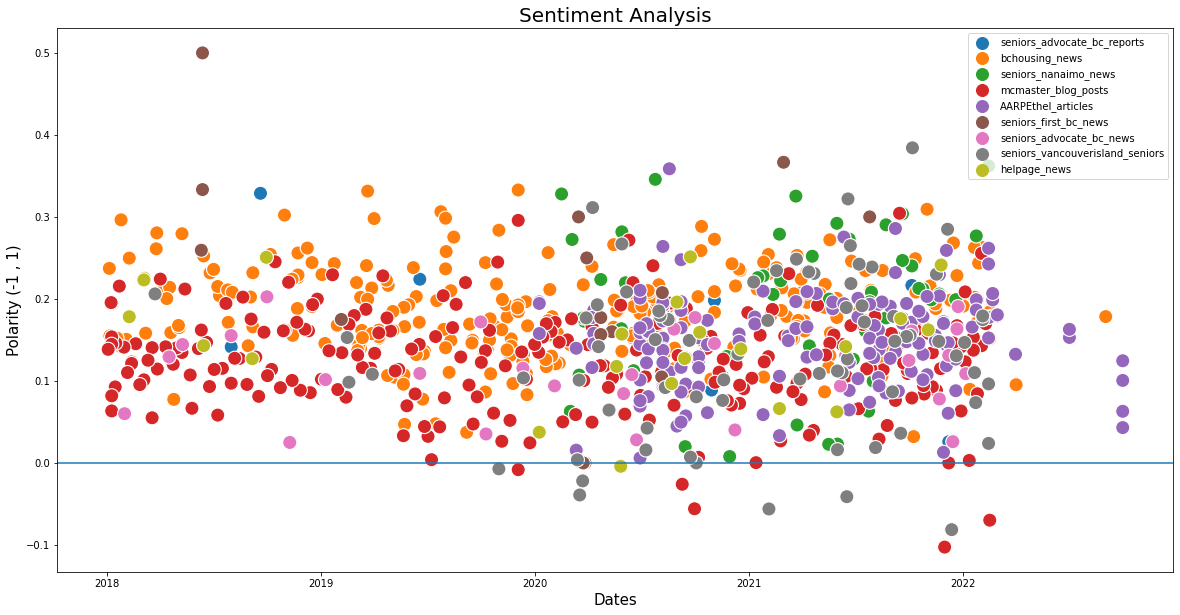

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 10]

sns.scatterplot(data=df_nodup2018, hue='website', x='dates', y='polarity', s = 200)
plt.legend(markerscale=2)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Polarity (-1 , 1)', fontsize=15)
plt.axhline(0)

plt.show()

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text major ticklabel objects>)

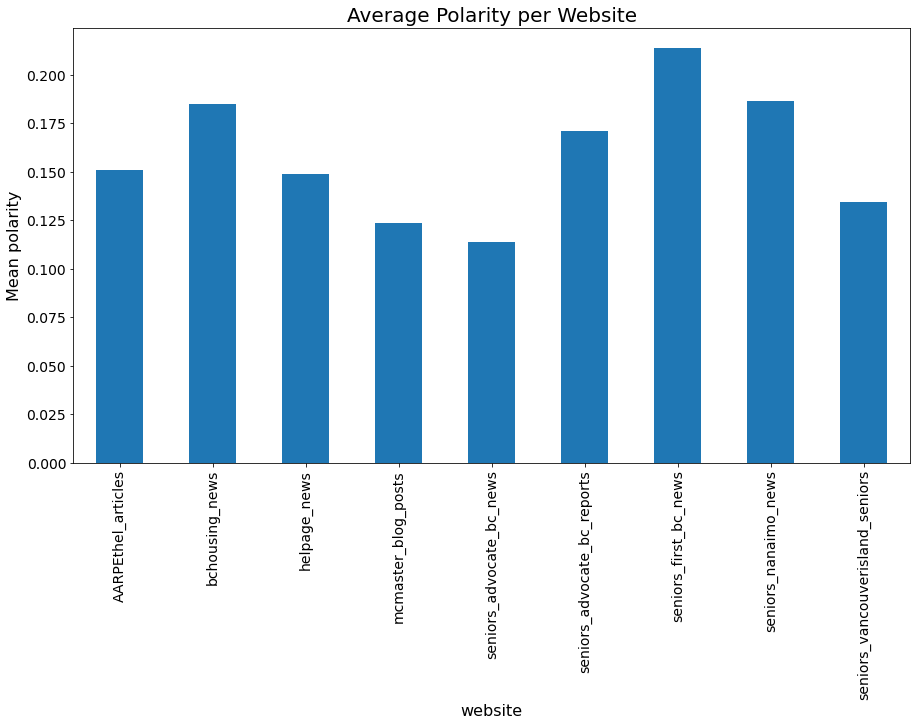

In [46]:
dfg = df_nodup2018.groupby(['website'])['polarity'].mean()

dfg.plot(kind='bar',figsize=(15, 8))
plt.title('Average Polarity per Website', fontsize=20)
plt.xlabel('website', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Mean polarity', fontsize=16)
plt.yticks(fontsize=14)

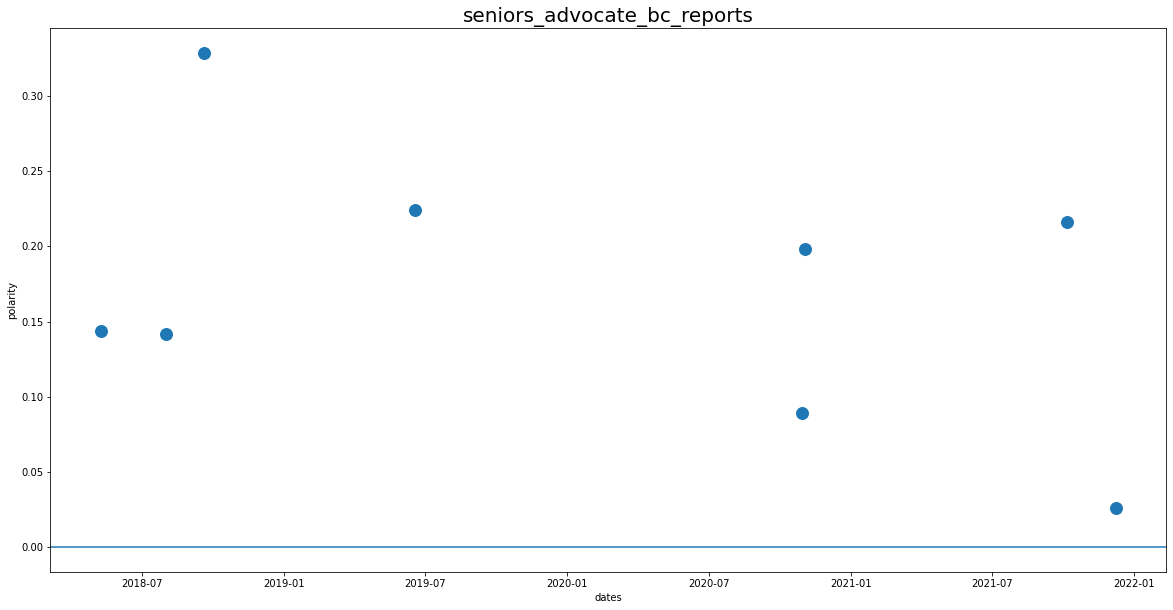

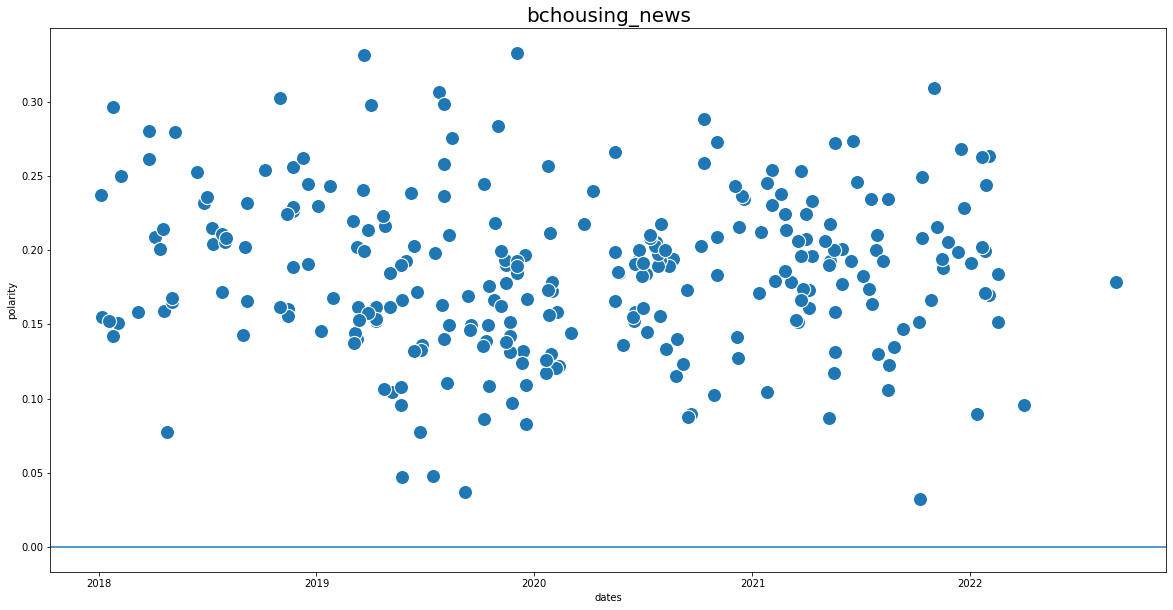

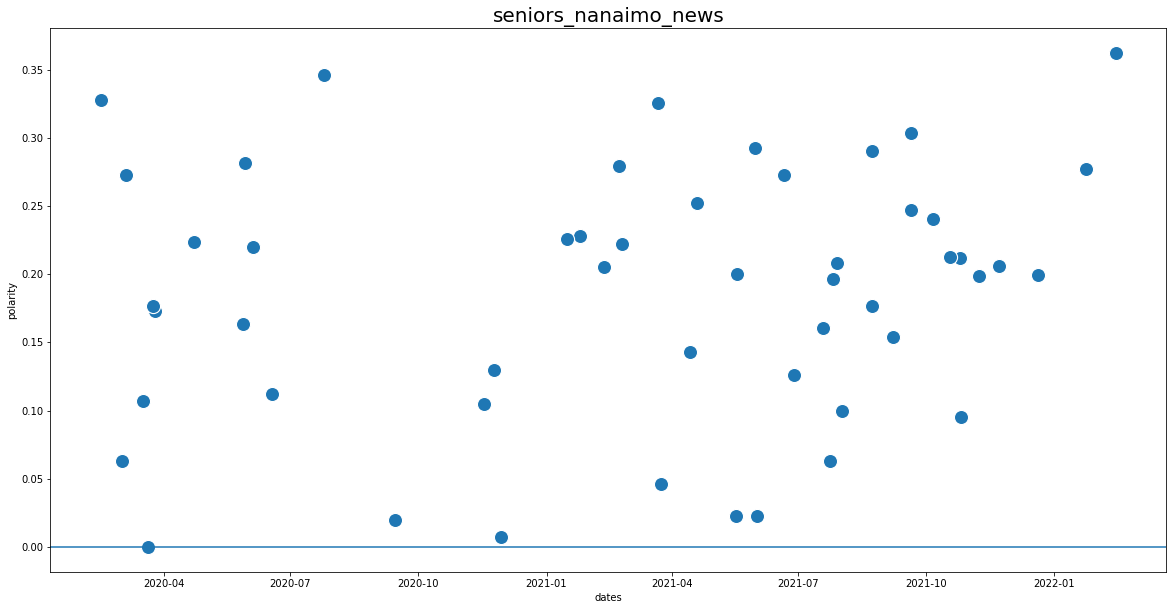

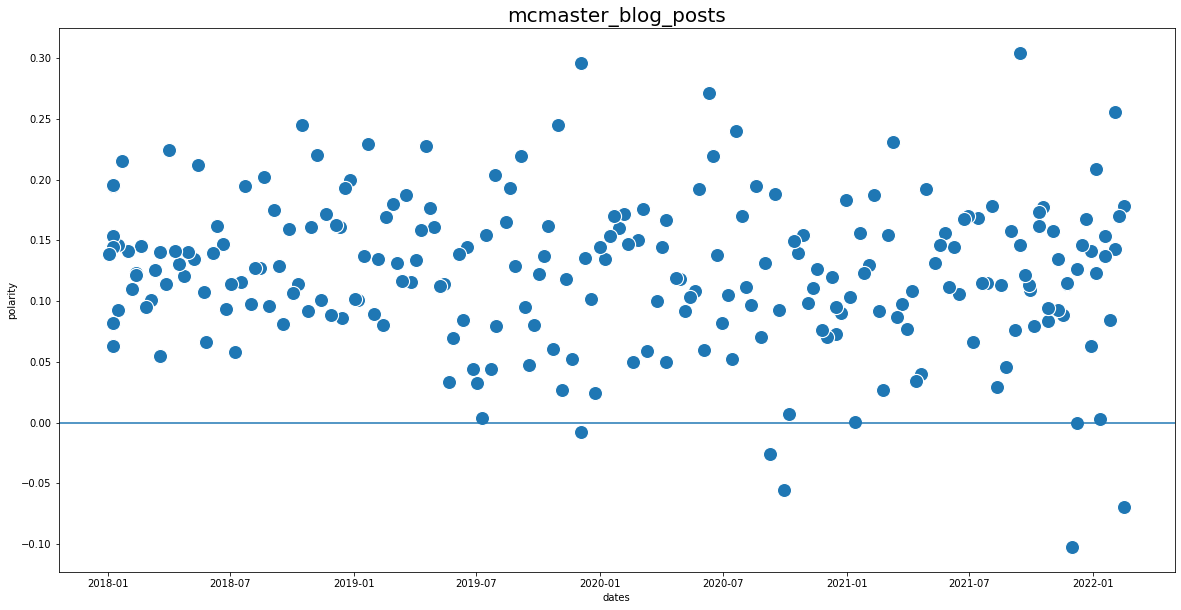

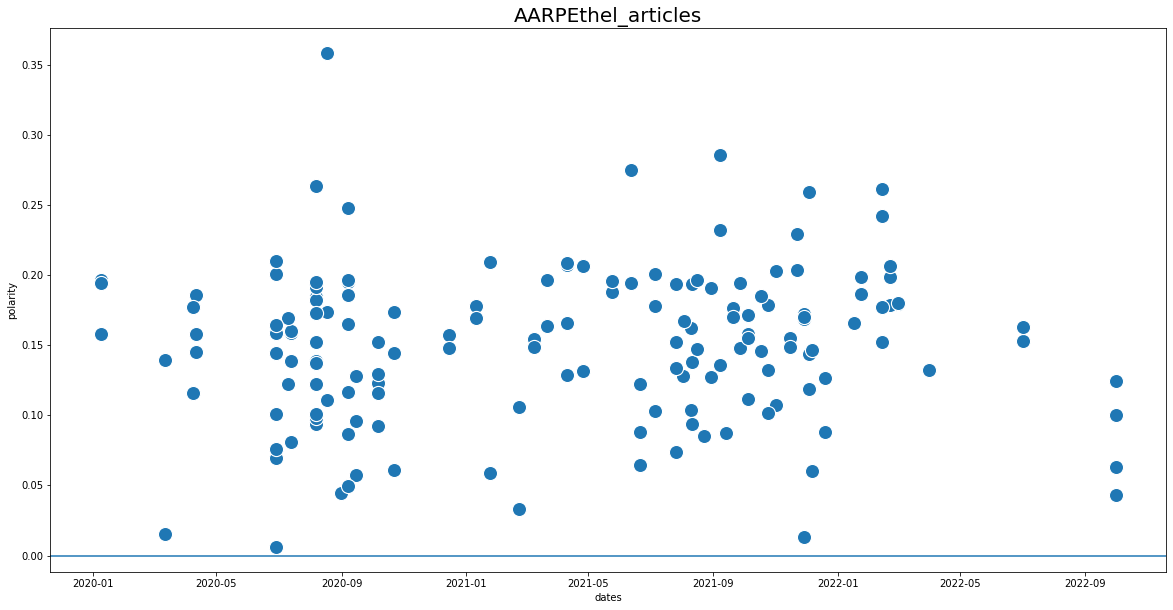

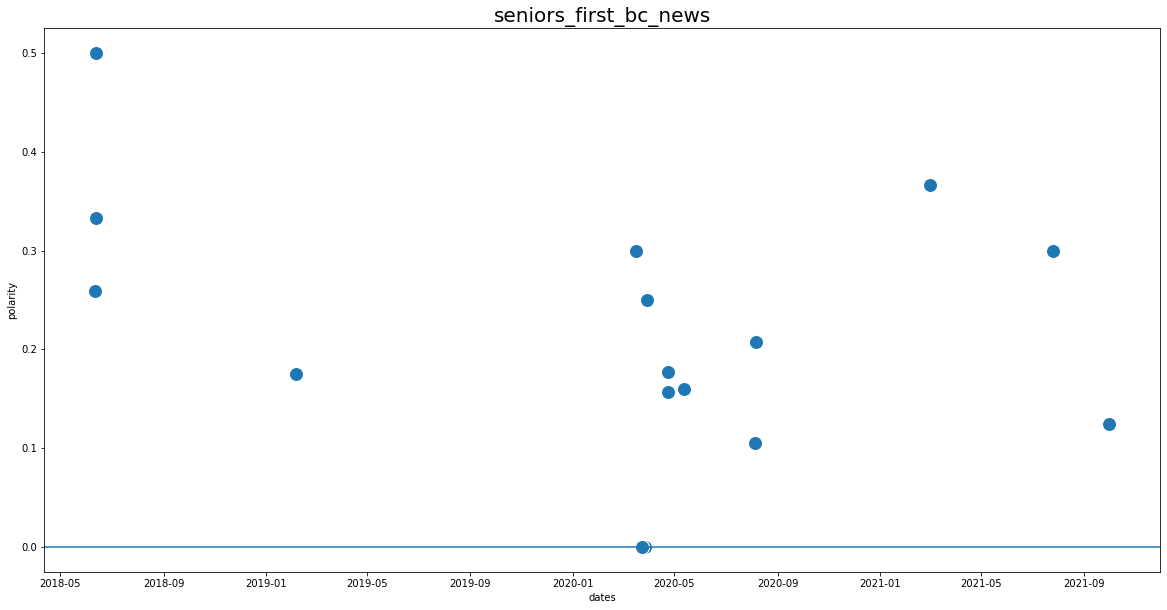

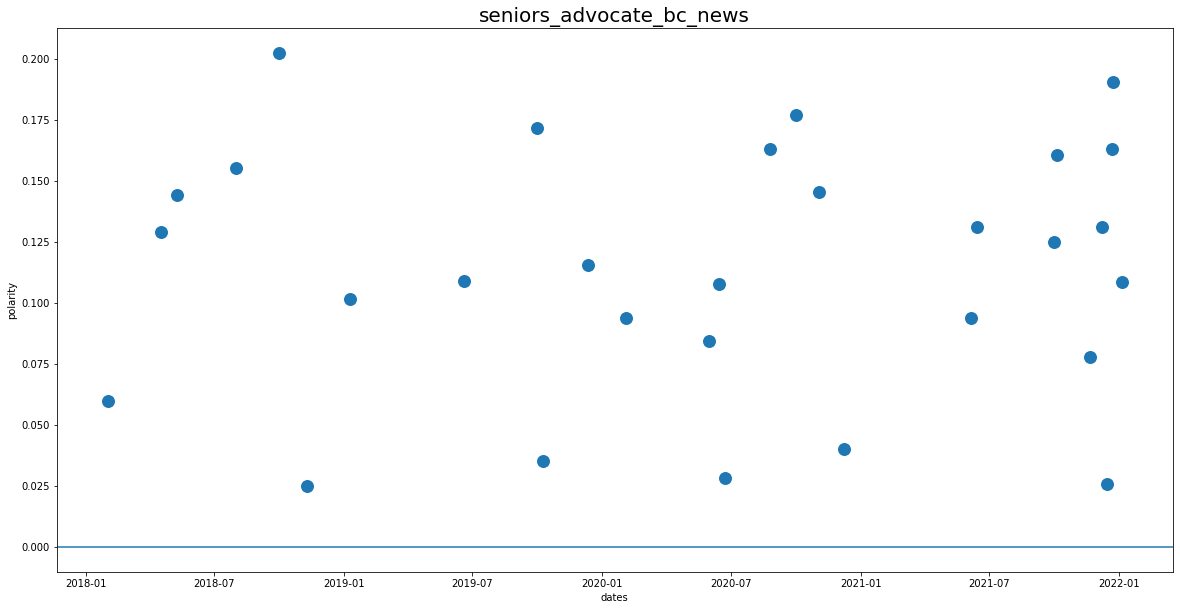

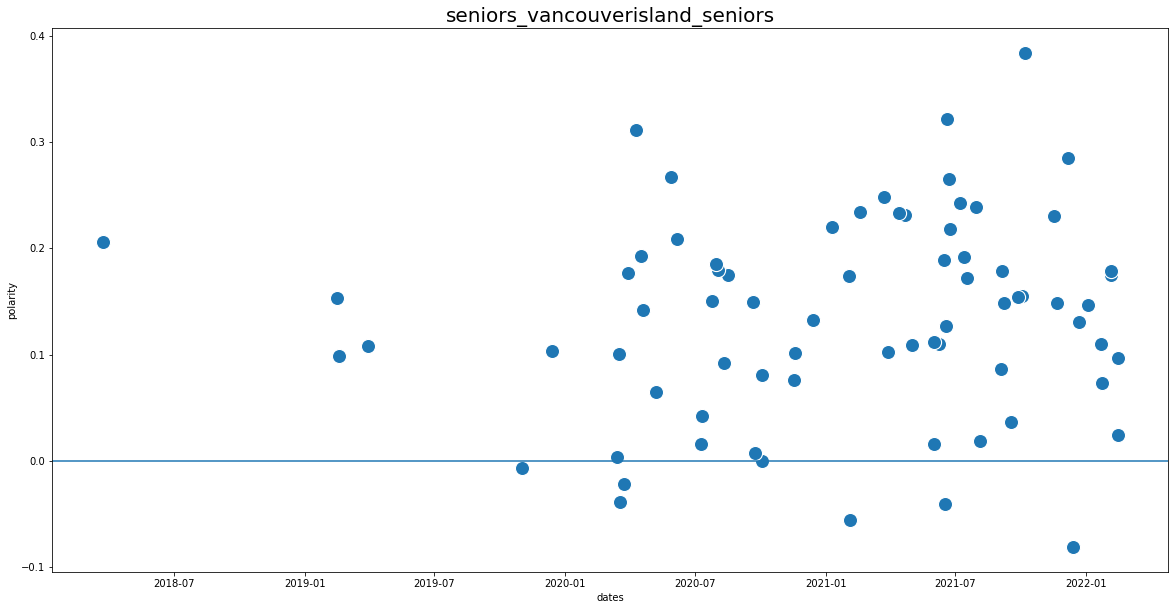

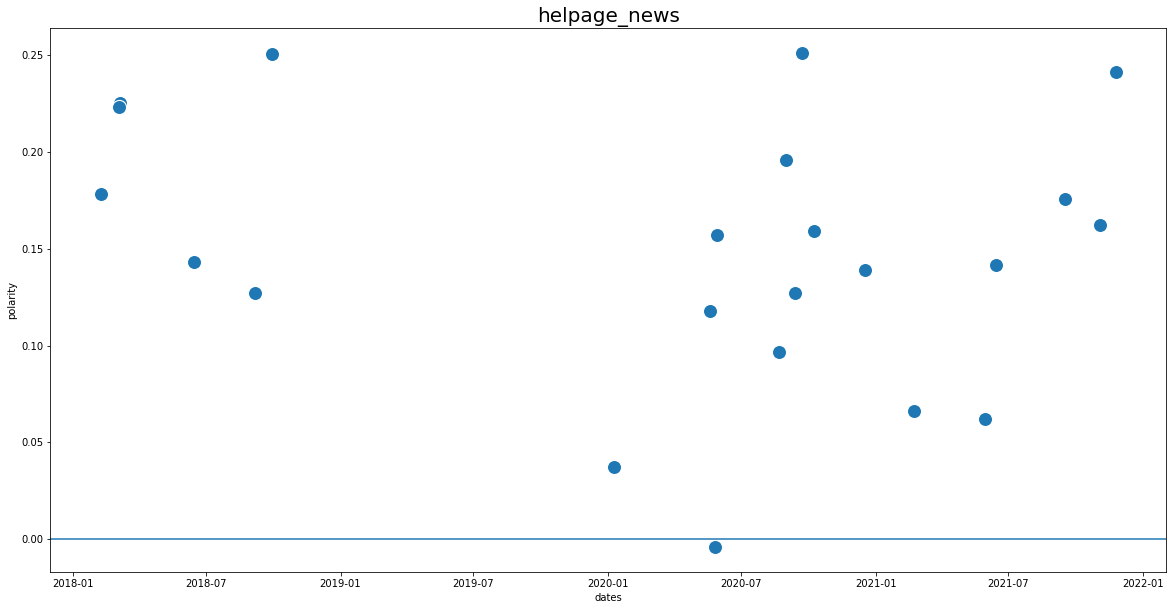

<Figure size 1440x720 with 0 Axes>

In [47]:
plt.subplots_adjust(wspace=0.5)

for i in df_nodup2018['website'].unique():
  sns.scatterplot(data=df_nodup2018[df_nodup2018['website'] == str(i)], x='dates', y='polarity', s = 200)
  plt.title(i, fontsize=20)
  plt.axhline(0)
  plt.figure()

In [29]:
#Looking in details for the negative news
df_nodup2018[df_nodup2018['polarity'] <0].sort_values('polarity').drop(df_nodup2018.columns[[3,4]],axis=1)

,links,dates,header,clean,website,polarity
468,https://www.mcmasteroptimalaging.org/blog/deta...,2021-12-01,Therapeutic rituals to overcome grief,if you have lost a loved one during the pande...,mcmaster_blog_posts,-0.102607
1110,https://www.vancouverislandfreedaily.com/news/...,2021-12-13,North Island MP says time running out to fix G...,the federal ndp are hoping to convince the lib...,seniors_vancouverisland_seniors,-0.081349
452,https://www.mcmasteroptimalaging.org/blog/deta...,2022-02-16,Dandruff or seborrheic dermatitis? An itch by ...,seborrheic dermatitis is a common rash charact...,mcmaster_blog_posts,-0.069792
1173,https://www.vancouverislandfreedaily.com/news/...,2021-02-04,"Alert Qualicum Beach resident, 77, foils ‘gran...",a fraudster was no match for an alert qualicu...,seniors_vancouverisland_seniors,-0.056111
535,https://www.mcmasteroptimalaging.org/blog/deta...,2020-09-30,3 evidence-based tips for living with heart fa...,wheezing feeling tired and weak trouble focusi...,mcmaster_blog_posts,-0.045573
1148,https://www.vancouverislandfreedaily.com/commu...,2021-06-17,Rolling show and shine ready to cruise Sidney ...,the excitement over an impending car parade to...,seniors_vancouverisland_seniors,-0.041152
1243,https://www.vancouverislandfreedaily.com/news/...,2020-03-18,Meals on Wheels finds kitchen to keep preparin...,meals on wheels have found a commercial kitche...,seniors_vancouverisland_seniors,-0.039043
538,https://www.mcmasteroptimalaging.org/blog/deta...,2020-09-09,Grieving experiences in the context of a pande...,has caused more than deaths to date and lef...,mcmaster_blog_posts,-0.025994
1242,https://www.vancouverislandfreedaily.com/news/...,2020-03-23,Outbreak of illness in Port Alberni seniors ho...,an outbreak of respiratory illness at two seni...,seniors_vancouverisland_seniors,-0.021898
1285,https://helpagecanada.ca/2020/05/helpage-canad...,2020-05-27,"HelpAge Canada supported over 150,000 seniors ...",elder abuse occurs in every country in the wor...,helpage_news,-0.009603


# 3. Word Cloud

In [48]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [49]:
df_nodup2018['clean'] = df_nodup2018.clean.apply(round2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
# Rechecking for stopwords
#frequency of words in the entire df['clean']
corpus = " ".join(df_nodup2018['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

In [54]:
ngramFreq.most_common(200)

[(('the',), 22352),
 (('and',), 18677),
 (('to',), 17287),
 (('of',), 14112),
 (('a',), 10773),
 (('in',), 9498),
 (('for',), 7704),
 (('with',), 5498),
 (('is',), 5475),
 (('housing',), 5158),
 (('that',), 4878),
 (('are',), 4209),
 (('i',), 3578),
 (('on',), 3451),
 (('people',), 3255),
 (('as',), 3233),
 (('or',), 3114),
 (('be',), 2767),
 (('homes',), 2739),
 (('this',), 2694),
 (('have',), 2634),
 (('will',), 2557),
 (('at',), 2396),
 (('their',), 2328),
 (('it',), 2289),
 (('we',), 2239),
 (('my',), 2104),
 (('you',), 2054),
 (('more',), 1996),
 (('new',), 1974),
 (('can',), 1964),
 (('our',), 1916),
 (('by',), 1777),
 (('was',), 1775),
 (('who',), 1728),
 (('bc',), 1685),
 (('affordable',), 1643),
 (('from',), 1642),
 (('seniors',), 1608),
 (('community',), 1582),
 (('an',), 1558),
 (('they',), 1554),
 (('your',), 1538),
 (('not',), 1464),
 (('health',), 1416),
 (('about',), 1382),
 (('older',), 1332),
 (('said',), 1267),
 (('care',), 1260),
 (('but',), 1256),
 (('all',), 1250),

In [55]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#Adding the unwanted words into the stopwords list.
stop_words = stopwords.words('english')
stop_words.extend(['the',
'and',
'to', 
'of', 
'a', 
'in',
'for', 
'is', 
'with',
'that', 
'are', 
'as', 
'on', 
'or', 
'i', 
'be', 
'have', 
'this', 
'at', 
'it', 
'their', 
'will', 
'we', 
'you', 
'can', 
'by', 
'who', 
'they', 
'our', 
'was', 
'from', 
'my', 
'new', 
'not', 
'your',
'an', 
'about', 
'but', 
'said', 
'all', 
'these', 
'has', 
'when', 
'also', 
'were', 
'one', 
'than', 
'–',
'may', 
'need',
'if', 
'her',
'there', 
'some', 
'she', 
'been', 
'other', 
'which', 
'its', 
'those', 
'many', 
'what', 
'so', 
'up', 
'do', 
'them', 
'how', 
'years', 
'us', 
'over', 
'had', 
'most', 
'no', 
'he', 
'between', 
'me', 
'such', 
'through', 
'—', 
'into', 
'including', 
'get', 
'would', 
'two', 
'while', 
'very', 
'where', 
'his', 
'only', 
'because', 
'often', 
'units', 
'could', 
'dont', 
'year', 
'during', 
'way', 
'want', 
'any', 
'says', 
'per', 
'example', 
'still', 
'see', 
'should', 
'number', 
'own'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)

In [57]:
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

In [58]:
BigramnonstopFreq.most_common(200)

[(('housing',), 5158),
 (('people',), 3255),
 (('homes',), 2739),
 (('bc',), 1685),
 (('affordable',), 1643),
 (('seniors',), 1608),
 (('community',), 1582),
 (('health',), 1416),
 (('older',), 1332),
 (('care',), 1260),
 (('province',), 1056),
 (('support',), 1026),
 (('help',), 1021),
 (('services',), 932),
 (('building',), 913),
 (('project',), 864),
 (('home',), 839),
 (('like',), 796),
 (('adults',), 781),
 (('social',), 779),
 (('needs',), 762),
 (('provide',), 743),
 (('residents',), 730),
 (('society',), 710),
 (('homelessness',), 677),
 (('incomes',), 671),
 (('women',), 670),
 (('place',), 657),
 (('life',), 657),
 (('government',), 646),
 (('city',), 639),
 (('families',), 633),
 (('time',), 625),
 (('age',), 603),
 (('living',), 598),
 (('make',), 597),
 (('work',), 578),
 (('well',), 574),
 (('first',), 565),
 (('learn',), 549),
 (('working',), 538),
 (('experiencing',), 536),
 (('risk',), 523),
 (('find',), 520),
 (('british',), 519),
 (('municipal',), 518),
 (('safe',), 

In [59]:
# image mask for wordcloud
#char_mask = np.array(Image.open("image.jpg"))  
#image_colors = ImageColorGenerator(char_mask)
text_l = BigramnonstopFreq.most_common(100) #list full of tuples (word, freq)

In [60]:
#lets unpack tuple to extract words
list1, list2 = zip(*text_l)
list1

(('housing',),
 ('people',),
 ('homes',),
 ('bc',),
 ('affordable',),
 ('seniors',),
 ('community',),
 ('health',),
 ('older',),
 ('care',),
 ('province',),
 ('support',),
 ('help',),
 ('services',),
 ('building',),
 ('project',),
 ('home',),
 ('like',),
 ('adults',),
 ('social',),
 ('needs',),
 ('provide',),
 ('residents',),
 ('society',),
 ('homelessness',),
 ('incomes',),
 ('women',),
 ('place',),
 ('life',),
 ('government',),
 ('city',),
 ('families',),
 ('time',),
 ('age',),
 ('living',),
 ('make',),
 ('work',),
 ('well',),
 ('first',),
 ('learn',),
 ('working',),
 ('experiencing',),
 ('risk',),
 ('find',),
 ('british',),
 ('municipal',),
 ('safe',),
 ('supportive',),
 ('rental',),
 ('part',),
 ('affairs',),
 ('live',),
 ('family',),
 ('build',),
 ('projects',),
 ('low',),
 ('approximately',),
 ('use',),
 ('even',),
 ('day',),
 ('construction',),
 ('review',),
 ('vancouver',),
 ('supports',),
 ('others',),
 ('access',),
 ('available',),
 ('take',),
 ('development',),
 ('staff',),


In [61]:
#list1 - list of words we want but has characters like \( \) \,
#clean the list
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w

In [62]:
text

' housing people homes bc affordable seniors community health older care province support help services building project home like adults social needs provide residents society homelessness incomes women place life government city families time age living make work well first learn working experiencing risk find british municipal safe supportive rental part affairs live family build projects low approximately use even day construction review vancouver supports others access available take development staff information includes children media know good around disabilities studies longterm communities minister physical individuals provided im important programs together canada providing three better research columbians call modular include full partnership'

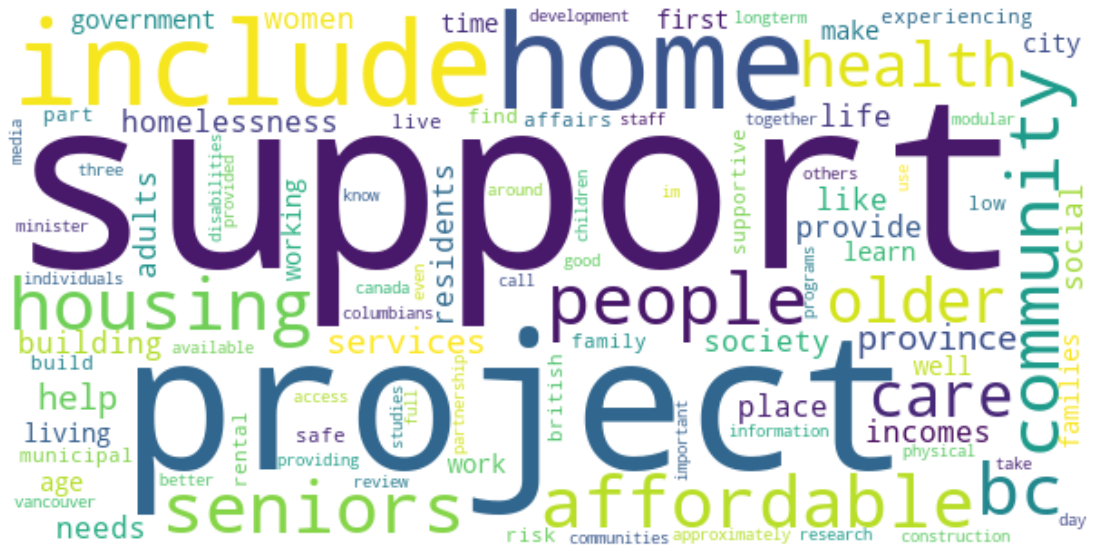

In [63]:
# create a wordcloud

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)


# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()
